<a href="https://colab.research.google.com/github/shoaib-intro/AIML/blob/main/Copy_of_BERT_Spam_Email_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BERT

Find tensor hub link here [here](https://www.tensorflow.org/hub)


In [ ]:
import tensorflow_hub as hub

#!pip install tensorflow-text
import tensorflow_text as txt

In [ ]:
preprocess_url= 'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3'
encoder_url = 'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4'

In [ ]:
# create hub for text preprocess
bert_preprocess_model = hub.KerasLayer(preprocess_url) # function pointer for text preprocessing

In [ ]:
# lets create movie classfification model

test_text = ['login failed', 'trying to restart container failed']
text_preprocessed = bert_preprocess_model(test_text) # supplly that text to bert preprocess function pointer
text_preprocessed.keys()

dict_keys(['input_word_ids', 'input_type_ids', 'input_mask'])

####Text initially surrounded by  [CLS] this is a good movie [SEP]
- word ids -> stores words id from oov(vocab)
- input mask -> stores 1 if values exits to this sentnce
- input type ids -> stores ids of sentences if they contains multiple sentences into one


In [ ]:
#text_preprocessed['input_mask']

In [ ]:
#text_preprocessed['input_type_ids']

In [ ]:
text_preprocessed['input_word_ids']

<tf.Tensor: shape=(2, 128), dtype=int32, numpy=
array([[  101,  8833,  2378,  3478,   102,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0, 



> ### Input type keys are not useful in this case so lets see how it stores multiple sentences ids whenver it has multiple sentences.



In [ ]:
#test_text = ['I do not like this movie.', 'dfk  however this movie is fantastic', 'i love python, its interesting']
#text_preprocessed = bert_preprocess_model(test_text)
#text_preprocessed

In [ ]:
bert_model = hub.KerasLayer(encoder_url)
bert_result = bert_model(text_preprocessed)  # fucntion pointer for bert_model
bert_result.keys()

dict_keys(['encoder_outputs', 'sequence_output', 'pooled_output', 'default'])

In [ ]:
len(bert_result['encoder_outputs']) 

12

Last output of BERT encoder model is equal to sequences_output which is final putput of model from 12(we used BERT model with 12 different encoded layers) different layers.

In [ ]:
bert_result['encoder_outputs'][-1] == bert_result['sequence_output']

<tf.Tensor: shape=(2, 128, 768), dtype=bool, numpy=
array([[[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],

       [[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]]])>

#### Let's generate model from this given model to bring into feesing for neural network. The encoder's outputs are the **pooled_output** to represents each input sequence as a whole, and the **sequence_output** to represent each input token in context. Either of those can be used as input to further model building.

To print pooled_outputs for inspection, the following code can be used:

In [ ]:
import tensorflow as tf
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string)
preprocessor = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
encoder_inputs = preprocessor(text_input)
encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4", trainable=True)
outputs = encoder(encoder_inputs)
pooled_output = outputs["pooled_output"] # [batch_size, 768].
sequence_output = outputs["sequence_output"] # [batch_size, seq_length, 768]. 

In [ ]:
embedding_model = tf.keras.Model(text_input, pooled_output)
sentences = tf.constant(["my text, yes its not a crime"]) 
#print(embedding_model(sentences))

## Text Classification using BERT & Tensorflow:
BERT is embedding technnique issued used and issued by google for their serch text embedding and predicting next senetence for their recomender system and search recomendation. 


In [ ]:
import pandas as pd

df = pd.read_csv('spam_ham_dataset.csv')
df.tail(5)

,Unnamed: 0,label,text,label_num
8367,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0.0
8368,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0.0
8369,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0.0
8370,1409,ham,Subject: industrial worksheets for august 2000...,0.0
8371,4807,spam,Subject: important online banking alert\r\ndea...,1.0


In [ ]:
df = df[df['label'].isin(['spam','ham'])]
df.groupby('label').describe()

label_num                                             
          count      mean       std  min  25%  50%  75%  max
label                                                       
ham      5916.0  0.000338  0.018385  0.0  0.0  0.0  0.0  1.0
spam     2437.0  0.999590  0.020257  0.0  1.0  1.0  1.0  1.0

In [ ]:
df['label'].value_counts()

ham     5916
spam    2437
Name: label, dtype: int64

In [ ]:
df_spam = df[df['label']=='spam']
df_spam.shape

(2437, 4)

In [ ]:
df_ham = df[df['label'] == 'ham']
df_ham.shape

(5916, 4)

In [ ]:
df_ham_downsampled = df_ham.sample(df_spam.shape[0])
df_ham_downsampled.shape

(2437, 4)

In [ ]:
df_balanced = pd.concat([df_spam, df_ham_downsampled])
df_balanced.shape

(4874, 4)

In [ ]:
df_balanced['label'].value_counts()

spam    2437
ham     2437
Name: label, dtype: int64

In [ ]:
df_balanced.sample(5)

,Unnamed: 0,label,text,label_num
4454,1454,ham,"Subject: enron / hpl actuals for august 23 , 2...",0.0
2657,2732,ham,Subject: fw : [ fwd : two prayer requests ]\r\...,0.0
3651,2358,ham,Subject: welcome to expedia . com !\r\nwelcome...,0.0
491,584,ham,Subject: re : new update for buybacks\r\npleas...,0.0
4565,4617,spam,Subject: samsung combination drive @ $ 34 . 90...,1.0


In [ ]:
df_balanced['spam'] = df_balanced['label'].apply(lambda x: 1 if x=='spam' else 0)
df_balanced.sample(5)

,Unnamed: 0,label,text,label_num,spam
1654,3344,ham,Subject: trv notification : ( waha - 06 / 21 /...,0.0,0
6407,1158,ham,Subject: 98 - 6892 ( sitara deal 319063 )\r\nt...,0.0,0
8051,3701,spam,Subject: aylesbgry sgclude oisv msjgnkrlf\r\nh...,1.0,1
5627,4997,spam,Subject: ciallis softabs onlly $ 3 . 99\r\n% q...,1.0,1
760,4783,spam,Subject: fw : windows xp + office xp = 80 dol ...,1.0,1


In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df_balanced['text'], df_balanced['spam'], stratify=df_balanced['spam'])

In [ ]:
x_train.head()

1718    Subject: cornhusker for sept\r\ndaren informed...
5032    Subject: online pharmacy yo\r\nwould you like ...
3046    Subject: 1 / 2000 meter 9643 three rivers issu...
1563    Subject: thanks from ken walther\r\ni can not ...
7224    Subject: re : cp & l\r\ncan we verified this g...
Name: text, dtype: object

## BERT part

In [ ]:
# get model and preprocessing details into keras layes to preocess it 
preprocess_bert= hub.KerasLayer('https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3')
encoder_model = hub.KerasLayer('https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4')

whenver a sentence is given as an input to the BERT model it should return a vector of length of 768 which is further fed to neural network. 
get_sentence_embedding('one email text')  --> vector 768
if we a give multiple emails text to this function it will return multpile arrays each of size 768.

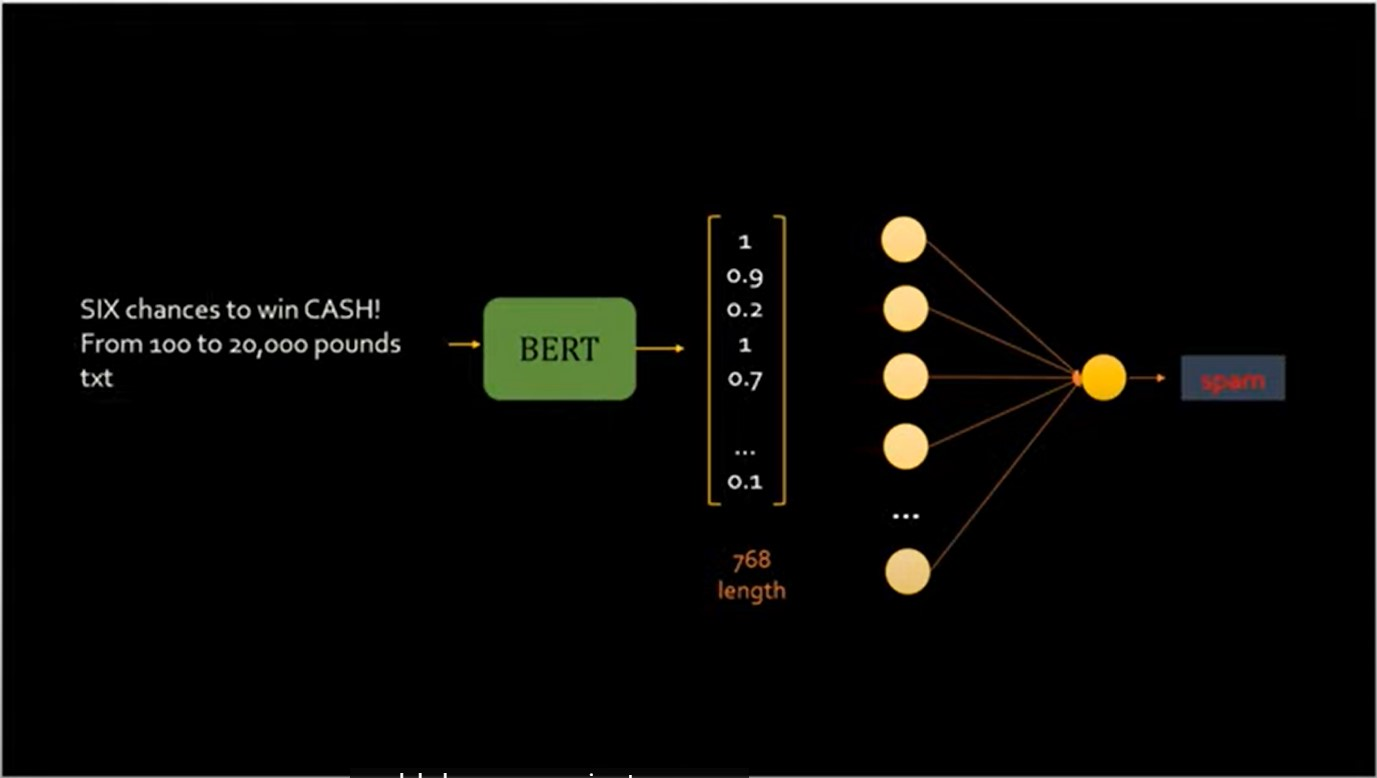

In [ ]:
def get_sentence_embedding(sentences):
  text_preprocessed = preprocess_bert(sentences) # get texted 
  bert_model_output = encoder_model(text_preprocessed)['pooled_output']  # output_pooled == encoder_output[-1]
  return bert_model_output

# testing
get_sentence_embedding([
                        "500% discount. huurry up",
                        "hey bro, are you up for volley ball today"
])

<tf.Tensor: shape=(2, 768), dtype=float32, numpy=
array([[-0.86368674, -0.49868053, -0.96039814, ..., -0.82212704,
        -0.7274485 ,  0.8637599 ],
       [-0.8987102 , -0.5625464 , -0.8711486 , ..., -0.8507718 ,
        -0.6928046 ,  0.9131626 ]], dtype=float32)>

In [ ]:
e = get_sentence_embedding([
                            'banana is bad to eat',
                            'high school student',
                            'we eat food',
                            'we do not like this game',
                            'criceket is not a vector'
])


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_similarity([e[0]], [e[4]])

array([[0.9317212]], dtype=float32)

## Create model 
either sequential or functional model. now in this program we will create funtional model as for previously we created all sequential models. while in funtional model we will create layers into function. 

read more details here:
https://medium.com/p/20684f766057 

In [ ]:
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')  # text is name od layer

preprocessed_text = preprocess_bert(text_input) # first BERT layer whic gets input sentences 
outputs = encoder_model(preprocessed_text) # embedded sentences output

# neural network layers

l = tf.keras.layers.Dropout(0.1, name='dropout_layer')(outputs['pooled_output']) # dropping 1% to save from overfiting
l = tf.keras.layers.Dense(1, activation='sigmoid', name='output') (l)

# construct final model
model = tf.keras.Model(inputs=[text_input], outputs=[l])


In [ ]:
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 keras_layer_8 (KerasLayer)     {'input_type_ids':   0           ['text[0][0]']                   
                                (None, 128),                                                      
                                 'input_word_ids':                                                
                                (None, 128),                                                      
                                 'input_mask': (Non                                               
                                e, 128)}                                                    

In [ ]:
Matrics = [
           tf.keras.metrics.BinaryAccuracy(name='accuracy'),
           tf.keras.metrics.Precision(name='precison'),
           tf.keras.metrics.Recall(name ='recall')
]

model.compile( 
    optimizer = 'adam',
    loss='binary_crossentropy', # training is driven by loss function
    metrics = Matrics
)

In [ ]:
#model.fit(x_train, y_train, epochs=5)

Epoch 1/5
115/115 [==============================] - 1774s 15s/step - loss: 0.6047 - accuracy: 0.6711 - precison: 0.6710 - recall: 0.6710
Epoch 2/5
115/115 [==============================] - 1777s 15s/step - loss: 0.5173 - accuracy: 0.7549 - precison: 0.7611 - recall: 0.7427
Epoch 3/5
115/115 [==============================] - 1736s 15s/step - loss: 0.4734 - accuracy: 0.7986 - precison: 0.8002 - recall: 0.7958
Epoch 4/5
115/115 [==============================] - 1751s 15s/step - loss: 0.4356 - accuracy: 0.8150 - precison: 0.8178 - recall: 0.8106
Epoch 5/5
115/115 [==============================] - 1808s 16s/step - loss: 0.3938 - accuracy: 0.8534 - precison: 0.8499 - recall: 0.8582


In [ ]:
model.evaluate(x_test, y_test)

In [ ]:
y_predicted = model.predict(X_test)
y_predicted = y_predicted.flatten()

In [ ]:
import numpy as np

y_predicted = np.where(y_predicted > 0.1, 1,0)
y_predicted

In [ ]:
from skelarn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(x_test, y_predicted)

In [ ]:
print(classification_report(y_test, y_predicted))

In [ ]:
reviews = [
           'Enter into a new page and fine 31 mar as outdated',
           'join this community to find work place',
           'why not are you looking for a job'
]
model.predict(reviews)